# Stereo matching

Author: github.com/2b-t

### Import required python modules

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage.io import imread, imsave

In [2]:
import os
import sys
sys.path.append(os.getcwd())
import stereo_matching as sm

# Set algorithm parameters

In [3]:
example_number = 1 #number of example in the example list

D = 60 #maximum disparity to consider
R = 3  #radius of the window to consider around the scan line point

X = 3  #accX tolerance

# Image import

In [4]:
# Select correct example
examples = ["bowling", "cones", "Adirondack"]
example  = examples[example_number]

# Read left and right images
im0 = imread("data/" + example + "_left.png")
im1 = imread("data/" + example + "_right.png")

# Try to read the ground-truth and mask
try:
    gt   = imread("data/" + example + "_gt.png")
    mask = imread("data/" + example + "_mask.png")
except:
    gt = None
    print("No ground truth found!")

<IPython.core.display.Javascript object>


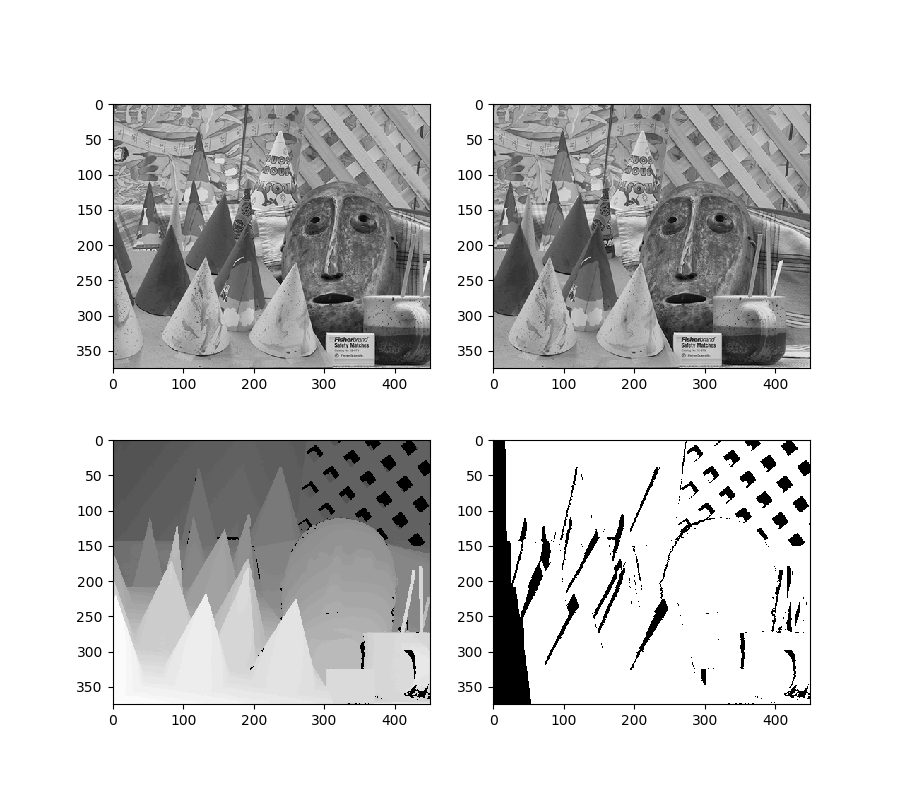

In [5]:
# Convert images to black and white
im0g = rgb2gray(im0)
im1g = rgb2gray(im1)

# Plot input images
fig = plt.figure(figsize=(9,8))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(im0g, cmap='gray');
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(im1g, cmap='gray');

# Try to plot the ground-truth and mask
try:
    ax3 = fig.add_subplot(2,2,3)
    ax3.imshow(gt, cmap='gray');
    ax4 = fig.add_subplot(2,2,4)
    ax4.imshow(mask, cmap='gray');
except:
    print("No ground truth found!") 

# Winner-takes-it-all (WTA)

## Sum of absolute differences (SAD) & winner-takes-it-all (WTA)

In [6]:
cv_sad  = sm.compute_costvolume_sad(im0g, im1g, D, R)
wta_sad = sm.compute_wta(cv_sad)

In [7]:
try:
    accX_wta_sad = sm.compute_accX(wta_sad, gt, mask, X)
    print(accX_wta_sad)
except:
    accX_wta_sad = 0
    print("No ground truth found!") 

0.8641315676111335


<IPython.core.display.Javascript object>


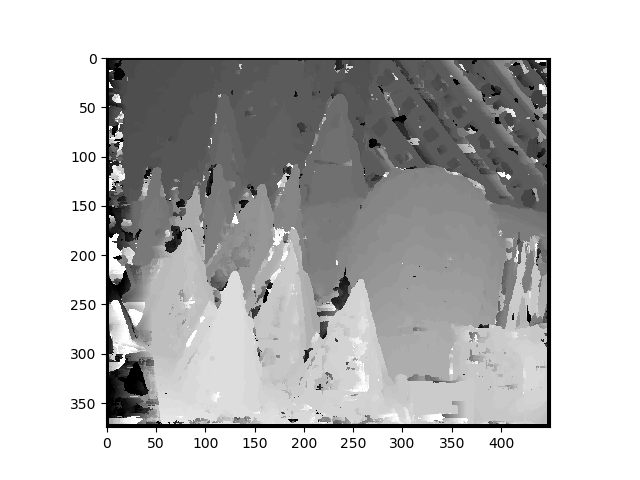

In [8]:
plt.figure()
plt.imshow(wta_sad, cmap='gray');

In [9]:
sm.export_img(sm.normalise_img(wta_sad, gt), "output/" + example, "SAD", "WTA", D, R, accX_wta_sad)

/home/tobit/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


## Sum of squared differences (SSD) & winner-takes-it-all (WTA)

In [10]:
cv_ssd  = sm.compute_costvolume_ssd(im0g, im1g, D, R)
wta_ssd = sm.compute_wta(cv_ssd)

In [11]:
try:
    accX_wta_ssd = sm.compute_accX(wta_ssd, gt, mask, X)
    print(accX_wta_ssd)
except:
    accX_wta_ssd = 0
    print("No ground truth found!") 

0.8813070605727944


<IPython.core.display.Javascript object>


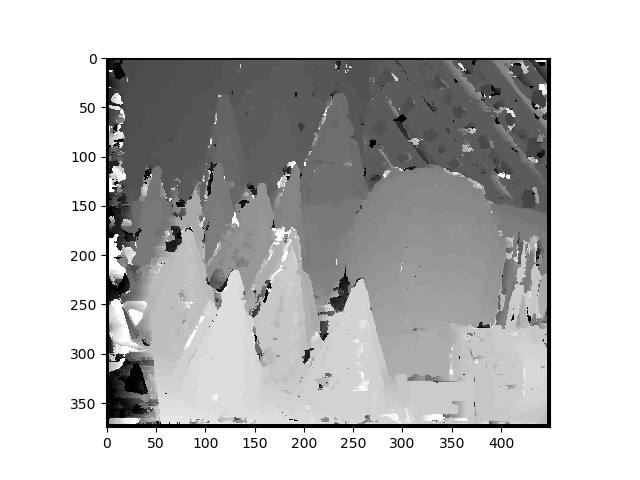

In [12]:
plt.figure()
plt.imshow(wta_ssd, cmap='gray');

In [13]:
sm.export_img(sm.normalise_img(wta_ssd, gt), "output/" + example, "SSD", "WTA", D, R, accX_wta_ssd)

/home/tobit/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


## Normalised cross-correlation (NCC) & winner-takes-it-all (WTA)

In [14]:
cv_ncc  = sm.compute_costvolume_ncc(im0g, im1g, D, R)
wta_ncc = sm.compute_wta(cv_ncc)

In [15]:
try:
    accX_wta_ncc = sm.compute_accX(wta_ncc, gt, mask, X)
    print(accX_wta_ncc)
except:
    accX_wta_ncc = 0
    print("No ground truth found!") 

0.9100648944596529


<IPython.core.display.Javascript object>


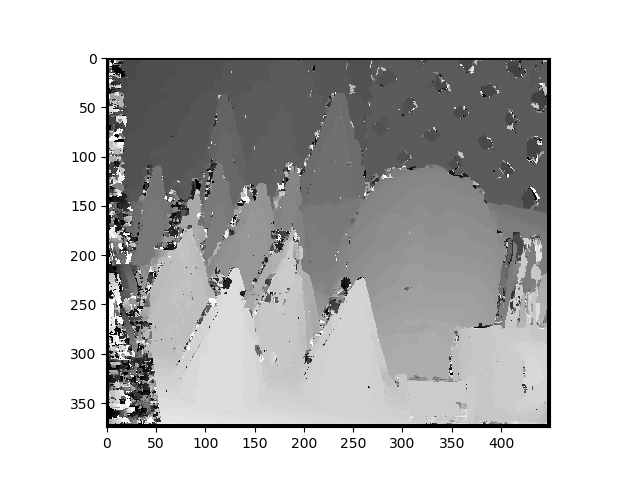

In [16]:
plt.figure()
plt.imshow(wta_ncc, cmap='gray');

In [17]:
sm.export_img(sm.normalise_img(wta_ncc, gt), "output/" + example, "NCC", "WTA", D, R, accX_wta_ncc)

/home/tobit/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


# Semi-global matching (SGM)

## Sum of absolute differences (SAD) & semi-global matching (SGM)

In [18]:
f = sm.get_f(D, 0.025, 0.5)
sgm_sad = sm.compute_sgm(cv_sad, f)

In [19]:
try:
    accX_sgm_sad = sm.compute_accX(sgm_sad, gt, mask, X)
    print(accX_sgm_sad)
except:
    accX_sgm_sad = 0
    print("No ground truth found!") 

0.9104609313119242


<IPython.core.display.Javascript object>


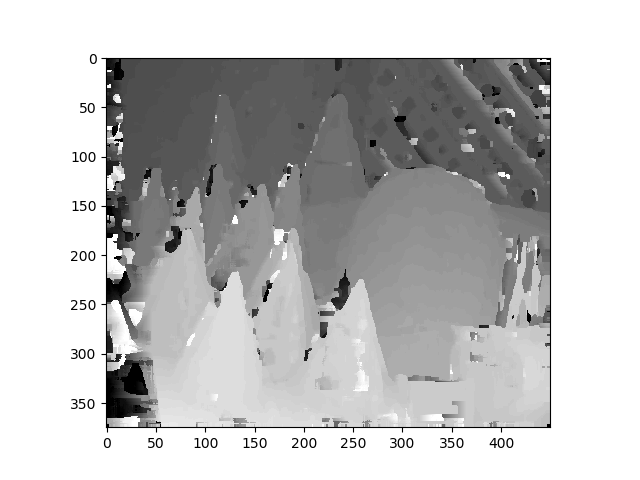

In [20]:
plt.figure()
plt.imshow(sgm_sad, cmap='gray');

In [21]:
sm.export_img(sm.normalise_img(sgm_sad, gt), "output/" + example, "SAD", "SGM", D, R, accX_sgm_sad)

/home/tobit/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


## Sum of squared differences (SSD) & semi-global matching (SGM)

In [22]:
sgm_ssd = sm.compute_sgm(cv_ssd, f)

In [23]:
try:
    accX_sgm_ssd = sm.compute_accX(sgm_ssd, gt, mask, X)
    print(accX_sgm_ssd)
except:
    accX_sgm_ssd = 0
    print("No ground truth found!") 

0.9516904520378527


<IPython.core.display.Javascript object>


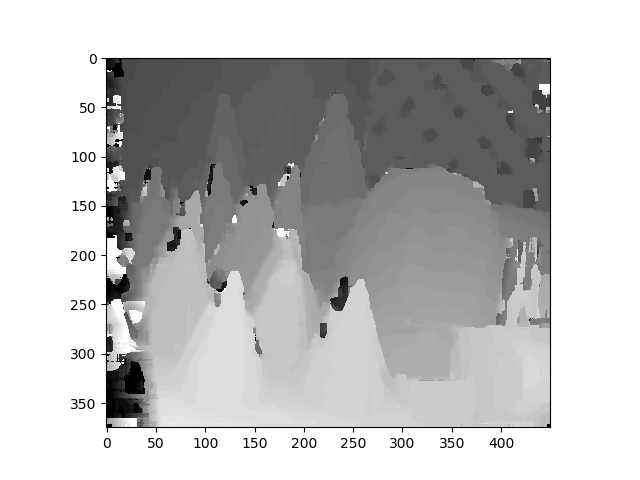

In [24]:
plt.figure()
plt.imshow(sgm_ssd, cmap='gray');

In [25]:
sm.export_img(sm.normalise_img(sgm_ssd, gt), "output/" + example, "SSD", "SGM", D, R, accX_sgm_ssd)

## Normalised cross-correlation (NCC) & semi-global matching (SGM)

In [26]:
sgm_ncc = sm.compute_sgm(cv_ncc, f)

In [27]:
try:
    accX_sgm_ncc = sm.compute_accX(sgm_ncc, gt, mask, X)
    print(accX_sgm_ncc)
except:
    accX_sgm_ncc = 0
    print("No ground truth found!") 

0.9515723357836666


<IPython.core.display.Javascript object>


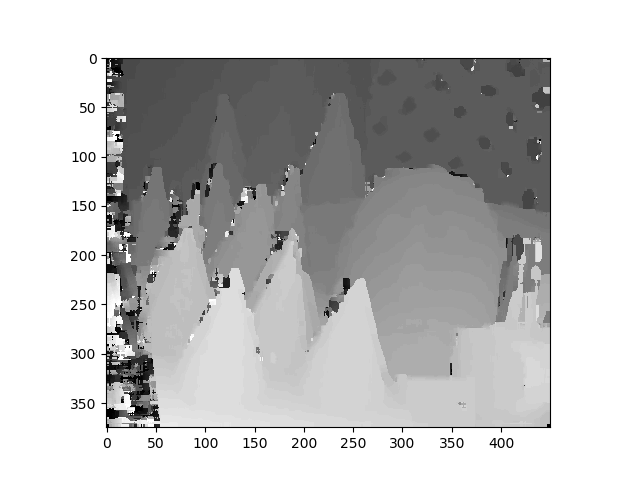

In [28]:
plt.figure()
plt.imshow(sgm_ncc, cmap='gray');

In [29]:
sm.export_img(sm.normalise_img(sgm_ncc, gt), "output/" + example, "NCC", "SGM", D, R, accX_sgm_ncc)

/home/tobit/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
